<a href="https://colab.research.google.com/github/williamokomba/DSC6_Moringa_School_week9_IP/blob/main/DSC6_week__9_b_IP_Moringa_school_20_12__William_IP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Email Spam Detection, Naive Bayes**

**Dataset provided**

Dataset [link](https://archive.ics.uci.edu/ml/datasets/Spambase)

Data grossary

SPAM E-MAIL DATABASE ATTRIBUTES

* word_freq_make continuous.
* word_freq_address: continuous.
* word_freq_all: continuous.
* word_freq_3d: continuous.
* word_freq_our: continuous.
* word_freq_over: continuous.
* word_freq_remove: continuous.
* word_freq_internet: continuous.
* word_freq_order : continuous.
* word_freq_mail: continuous.
* word_freq_receive :continuous.
* word_freq_will: continuous.
* word_freq_people: continuous.
* word_freq_report:continuous.
* word_freq_addresses: continuous.
* word_freq_free: continuous.
* word_freq_business:continuous.
* word_freq_email:continuous.
* word_freq_you: continuous.
* word_freq_credit:continuous.
* word_freq_your:  continuous.
* word_freq_font:  continuous.
* word_freq_000:  continuous.
* word_freq_money:  continuous.
* word_freq_hp: continuous.
* word_freq_hpl:  continuous.
* word_freq_george: continuous.
* word_freq_650:  continuous.
* word_freq_lab: continuous.
* word_freq_labs:   continuous.
* word_freq_telnet:  continuous. 
* word_freq_857:   continuous.
* word_freq_data:  continuous. 
* word_freq_415:   continuous.
* word_freq_85:   continuous.
* word_freq_technology:  continuous.
* word_freq_1999:   continuous.
* word_freq_parts: continuous.
* word_freq_pm:   continuous.
* word_freq_pm:  continuous.
* word_freq_direct:  continuous.
* word_freq_cs:  continuous.
* word_freq_meeting:  continuous.
* word_freq_original: continuous.
* word_freq_project: continuous.
* word_freq_re:     continuous.
* word_freq_edu:   continuous.
* word_freq_table:   continuous.
* word_freq_conference:  continuous.
* char_freq_;:            continuous.
* char_freq_(:            continuous.
* char_freq_[:            continuous.
* char_freq_!:            continuous.
* char_freq_$:            continuous.
* char_freq_#:            continuous.
* capital_run_length_average: continuous
* capital_run_length_longest: continuous
* capital_run_length_total:   continuous.
* 1: 1 spam, 0 non spam class






### 1.1 Specifying the data analytic question

Using Naive Bayes Classifier, we are to determine whether an email is spam or not.

### 1.2 Defining the metric for success

We will use the accuracy score  to evaluate the performance of our model.

### 1.3 Understanding the Context

while receiving alot of emails, it can be classified as spam or not based on the words it contain. thus it is vital to make the settings on your email so that whenever you receive an email it can be classified as spam or not.



### 1.4 Recording the Experimental Design

* upload and read our csv files
* clean our dataset
* perfom EDA
* build our models using Naive Bayes
* challenge our solueion

###1.5 Assessing the Relevance of the Data

the data set is correct as verified from Kaggle which is the leading data open source.

In [27]:

# Importing the necessary files to our environment
#
import numpy as np         # Used for mathematical computations
import pandas as pd        # Used for data analysis in python

# Visualization libraries are used for visualizing the data
#
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning libraries
#
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
#

## 2.Loading and reading Our Datasets

In [28]:
#loadig the dataset
#
spam_df=pd.read_csv("/content/spambase.csv")
spam_df.head()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,0.7,0.64.2,0.8,0.9,0.10,0.32.1,0.11,1.29,1.93,0.12,0.96,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32.2,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


## 3. Checking the Data

In [29]:
# checking the number of records in our dataset
#
spam_df.shape

(4600, 58)

**observation**: the dataset has 4600 records and 58 variables.

In [30]:
# preview the first 5 records
spam_df.head()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,0.7,0.64.2,0.8,0.9,0.10,0.32.1,0.11,1.29,1.93,0.12,0.96,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32.2,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


In [31]:
# Previewing the bottom of our dataset
# 
spam_df.tail()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,0.7,0.64.2,0.8,0.9,0.10,0.32.1,0.11,1.29,1.93,0.12,0.96,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32.2,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
4595,0.31,0.0,0.62,0.0,0.00,0.31,0.0,0.0,0.0,0.0,0.0,1.88,0.00,0.0,0.0,0.0,0.0,0.0,0.62,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.31,0.31,0.31,0.0,0.0,0.000,0.232,0.0,0.000,0.0,0.0,1.142,3,88,0
4596,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,6.00,0.0,2.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,2.00,0.0,0.0,0.000,0.000,0.0,0.353,0.0,0.0,1.555,4,14,0
4597,0.30,0.0,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1.80,0.30,0.0,0.0,0.0,0.0,0.9,1.50,0.0,0.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,1.20,0.0,0.0,0.102,0.718,0.0,0.000,0.0,0.0,1.404,6,118,0
4598,0.96,0.0,0.00,0.0,0.32,0.00,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.0,0.0,0.0,0.0,0.0,1.93,0.0,0.32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.32,0.0,0.0,0.000,0.057,0.0,0.000,0.0,0.0,1.147,5,78,0
4599,0.00,0.0,0.65,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.65,0.0,0.0,0.0,0.0,0.0,4.60,0.0,0.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.97,0.65,0.0,0.0,0.000,0.000,0.0,0.125,0.0,0.0,1.250,5,40,0


**observation**: the dataset looks uniform from top to bottom.

In [32]:
#checking for datatypes
#
spam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       4600 non-null   float64
 1   0.64    4600 non-null   float64
 2   0.64.1  4600 non-null   float64
 3   0.1     4600 non-null   float64
 4   0.32    4600 non-null   float64
 5   0.2     4600 non-null   float64
 6   0.3     4600 non-null   float64
 7   0.4     4600 non-null   float64
 8   0.5     4600 non-null   float64
 9   0.6     4600 non-null   float64
 10  0.7     4600 non-null   float64
 11  0.64.2  4600 non-null   float64
 12  0.8     4600 non-null   float64
 13  0.9     4600 non-null   float64
 14  0.10    4600 non-null   float64
 15  0.32.1  4600 non-null   float64
 16  0.11    4600 non-null   float64
 17  1.29    4600 non-null   float64
 18  1.93    4600 non-null   float64
 19  0.12    4600 non-null   float64
 20  0.96    4600 non-null   float64
 21  0.13    4600 non-null   float64
 22  

**observation**: the variable has int and float datatype which is appropriate.

## 4. External Data Source Validation

### ### a. Validation

## 5. Tidying the Dataset

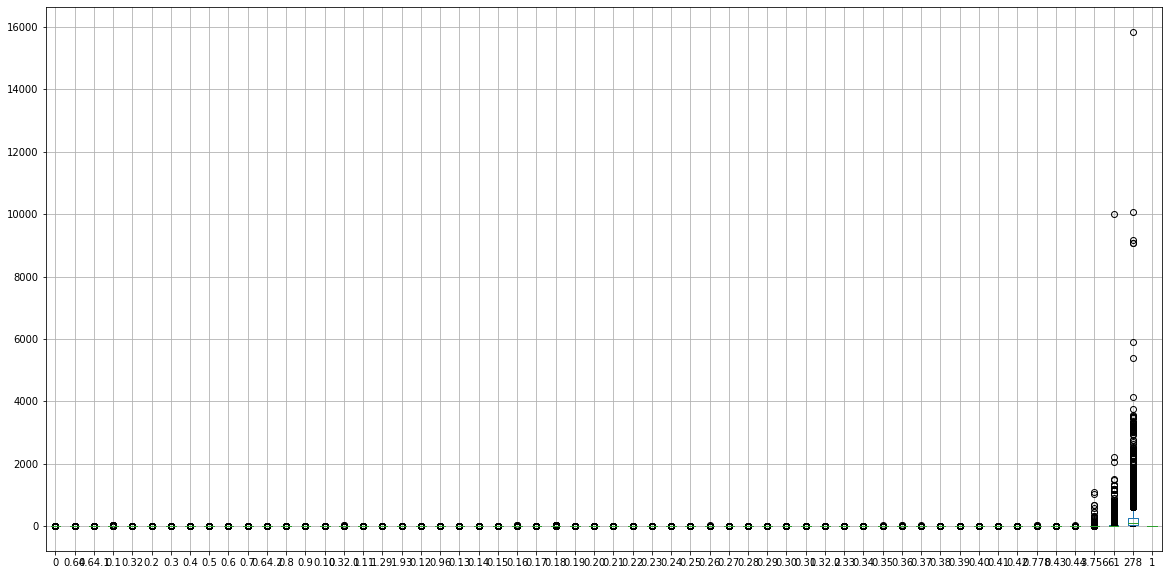

In [33]:
# Checking for Outliers
#
spam_df1=spam_df.copy()
#
plt.figure(figsize = (20, 10))
spam_df1.boxplot()
plt.show()

**observation**; there are lots of outliers but we will not remove them since they look genuine.

In [34]:
#checking anomalies
#
spam_df1.nunique()

0          142
0.64       171
0.64.1     214
0.1         43
0.32       255
0.2        141
0.3        173
0.4        170
0.5        144
0.6        245
0.7        113
0.64.2     316
0.8        158
0.9        133
0.10       118
0.32.1     253
0.11       197
1.29       229
1.93       575
0.12       148
0.96       401
0.13        99
0.14       164
0.15       143
0.16       395
0.17       281
0.18       240
0.19       200
0.20       156
0.21       179
0.22       128
0.23       106
0.24       184
0.25       110
0.26       177
0.27       159
0.28       188
0.29        53
0.30       163
0.31       125
0.32.2     108
0.33       186
0.34       136
0.35       160
0.36       230
0.37       227
0.38        38
0.39       106
0.40       313
0.41       641
0.42       225
0.778      963
0.43       504
0.44       316
3.756     2160
61         271
278        919
1            2
dtype: int64

In [35]:
# checking for the Missing Data
#
spam_df1.isnull().sum().sum()

0

**observation**: there is no missing values.

In [36]:
#checking for duplicates
#
spam_df1.duplicated().sum()

391

In [37]:
#dropping duplicates
#
spam_df1.drop_duplicates(inplace = True)
#
#confirming no duplicates
spam_df1.duplicated().any()

False

In [38]:
#checking clean dataset shape
#
spam_df1.shape

(4209, 58)

**observation**: clean dataset has 4209 records and 58 variables.

## 6. Exploratory Data Analysis

In [39]:
# precise summary of the dataset
#
spam_df1.describe()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,0.7,0.64.2,0.8,0.9,0.10,0.32.1,0.11,1.29,1.93,0.12,0.96,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32.2,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
count,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.00000,4209.000000
mean,0.104391,0.112530,0.291390,0.063093,0.325322,0.096679,0.117503,0.108026,0.091882,0.248479,0.056700,0.565187,0.097679,0.061226,0.044813,0.253813,0.149190,0.188494,1.718318,0.084982,0.810005,0.131618,0.100646,0.090991,0.574132,0.279397,0.369926,0.128605,0.098406,0.103804,0.063559,0.044928,0.102357,0.045788,0.107907,0.099392,0.143516,0.014193,0.084077,0.061292,0.041442,0.141575,0.048784,0.085286,0.320200,0.189420,0.005788,0.034754,0.040413,0.144082,0.017380,0.281018,0.076075,0.045809,5.384282,52.137800,291.18508,0.398670
std,0.300036,0.454241,0.515752,1.352647,0.687887,0.276059,0.397327,0.410328,0.282174,0.656705,0.184186,0.882617,0.309342,0.346106,0.242214,0.797629,0.457718,0.540931,1.768967,0.505641,1.149486,1.071384,0.351375,0.431772,1.676715,0.905650,1.775532,0.535489,0.576863,0.439618,0.387312,0.300783,0.569211,0.301847,0.530323,0.386513,0.424553,0.230539,0.448043,0.319556,0.318214,0.793895,0.231898,0.646171,1.046027,0.928413,0.079180,0.298556,0.252562,0.274280,0.105743,0.843387,0.239734,0.435976,33.151287,199.605834,618.72831,0.489683
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.00000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.627000,7.000000,40.00000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.190000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.360000,0.000000,0.290000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.073000,0.000000,0.016000,0.000000,0.000000,2.297000,15.000000,101.00000,0.000000
75%,0.000000,0.000000,0.440000,0.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.190000,0.000000,0.830000,0.000000,0.000000,0.000000,0.120000,0.000000,0.000000,2.720000,0.000000,1.280000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000

In [40]:
#Identify Highly Correlated Features
#
#correlation matrix
corr_matrix= spam_df1.corr().abs()
corr_matrix

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,0.7,0.64.2,0.8,0.9,0.10,0.32.1,0.11,1.29,1.93,0.12,0.96,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32.2,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
0,1.000000,0.034114,0.063267,0.005384,0.021740,0.055040,0.011037,0.004392,0.103818,0.040799,0.063007,0.075919,0.061960,0.032249,0.022439,0.065451,0.081447,0.051765,0.120575,0.020910,0.121471,0.025585,0.126457,0.205676,0.075085,0.063494,0.048104,0.050075,0.041556,0.054262,0.038913,0.031647,0.042731,0.026335,0.046101,0.057318,0.058801,0.008632,0.011215,0.035484,0.005291,0.026562,0.025621,0.022991,0.037874,0.034472,0.000956,0.018914,0.027262,0.019680,0.034798,0.059236,0.101934,0.009158,0.044779,0.059132,0.084126,0.129321
0.64,0.034114,1.000000,0.027609,0.008936,0.036983,0.005623,0.077468,0.013781,0.053525,0.184441,0.060819,0.026228,0.015628,0.012465,0.061887,0.046615,0.022112,0.178408,0.055852,0.006690,0.117780,0.001249,0.007145,0.061350,0.053488,0.044550,0.011172,0.032939,0.026005,0.029359,0.015895,0.028897,0.032530,0.026085,0.025472,0.028196,0.003843,0.012693,0.016159,0.002379,0.019317,0.035865,0.037745,0.029024,0.020116,0.025952,0.012319,0.020919,0.014782,0.028209,0.019394,0.031702,0.044449,0.030702,0.029373,0.053866,0.034601,0.100346
0.64.1,0.063267,0.027609,1.000000,0.019895,0.065681,0.066608,0.028630,0.007263,0.077618,0.025201,0.055700,0.065723,0.036484,0.004928,0.104609,0.061927,0.029889,0.110528,0.126490,0.030903,0.147883,0.039446,0.106747,0.031186,0.092635,0.066418,0.081269,0.051435,0.057823,0.030483,0.036585,0.063558,0.057977,0.063396,0.048938,0.047555,0.074279,0.031767,0.017389,0.045985,0.030803,0.007592,0.052705,0.056865,0.056554,0.060529,0.027397,0.029448,0.036754,0.024462,0.035780,0.097231,0.073000,0.004503,0.095684,0.092511,0.051967,0.172193
0.1,0.005384,0.008936,0.019895,1.000000,0.000256,0.009167,0.014286,0.003798,0.001044,0.003849,0.013195,0.018576,0.013156,0.003377,0.005373,0.005799,0.002831,0.016592,0.009932,0.005008,0.004578,0.030587,0.014712,0.025849,0.015706,0.014033,0.009712,0.010632,0.007933,0.010914,0.007656,0.006969,0.008248,0.006977,0.005909,0.006312,0.007440,0.002724,0.004508,0.007656,0.006076,0.008320,0.009387,0.006115,0.013182,0.009434,0.003410,0.001862,0.000030,0.011450,0.007516,0.003861,0.008269,0.000133,0.005754,0.022106,0.023784,0.056407
0.32,0.021740,0.036983,0.065681,0.000256,1.000000,0.041392,0.135958,0.023410,0.014482,0.027232,0.079165,0.055008,0.020656,0.001586,0.048309,0.079199,0.137869,0.050814,0.083092,0.027838,0.142992,0.022716,0.062136,0.000320,0.076785,0.079809,0.062483,0.064151,0.039627,0.053614,0.042054,0.024256,0.034750,0.024556,0.051059,0.052211,0.077684,0.133057,0.045513,0.017580,0.052325,0.107706,0.054583,0.002770,0.049499,0.083315,0.028146,0.035040,0.035049,0.054583,0.027988,0.019205,0.040696,0.002144,0.050832,0.042985,0.010498,0.230117
0.2,0.055040,0.005623,0.066608,0.009167,0.041392,1.000000,0.046844,0.079683,0.097012,0.010068,0.056568,0.001589,0.067254,0.007918,0.139996,0.016688,0.057658,0.059395,0.083323,0.057489,0.105705,0.006859,0.181734,0.059413,0.086713,0.089548,0.050829,0.067792,0.048913,0.048282,0.046362,0.036538,0.035047,0.037102,0.055412,0.054320,0.060639,0.018425,0.049239,0.027739,0.030909,0.056557,0.037628,0.030185,0.057496,0.034381,0.014747,0.033488,0.021758,0.011628,0.016743,0.058173,0.105903,0.020405,0.013559,0.065714,0.063402,0.212455
0.3,0.011037,0.077468,0.028630,0.014286,0.135958,0.046844,1.000000,0.033675,0.049216,0.055670,0.186777,0.008432,0.003143,0.023831,0.037425,0.135882,0.189635,0.115648,0.102598,0.049664,0.143781,0.002944,0.068424,0.034532,0.095021,0.084690,0.060474,0.070284,0.050273,0.061318,0.047909,0.042713,0.043030,0.043152,0.055224,0.057370,0.055945,0.015450,0.049438,0.019723,0.035884,0.052023,0.053156,0.036302,0.057296,0.059140,0.018179,0.033258,0.034092,0.061357,0.029478,0.051036,0.067215,0.049300,0.039171,0.050828,0.017082,0.334605
0.4,0.004392,0.013781,0.007263,0

In [41]:
# Select upper triangle of correlation matrix
#
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

In [42]:
#finding the index of the features with correlation > 0.95
#
to_drop =[columns for columns in upper.columns if any(upper[columns]> 0.95)]
to_drop

['0.25']

In [43]:
#Drop Marked Features
#
spam_df1.drop(spam_df1[to_drop],axis=1)

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,0.7,0.64.2,0.8,0.9,0.10,0.32.1,0.11,1.29,1.93,0.12,0.96,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.26,0.27,0.28,0.29,0.30,0.31,0.32.2,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.00,0.06,0.06,0.0,0.0,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,0.00,1.88,0.00,0.00,0.00,0.00,0.00,0.00,0.62,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.31,0.31,0.31,0.0,0.0,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4596,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6.00,0.00,2.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,2.00,0.0,0.0,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4597,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.80,0.30,0.00,0.00,0.00,0.00,0.90,1.50,0.00,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,1.20,0.0,0.0,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4598,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.32,0.00,0.00,0.00,0.00,0.00,0.00,1.93,0.00,0.32,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.32,0.00,0.32,0.0,0.0,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


**observation** we dropped on highly correlated variable. the new dataset has 4209 records and 57 variables.

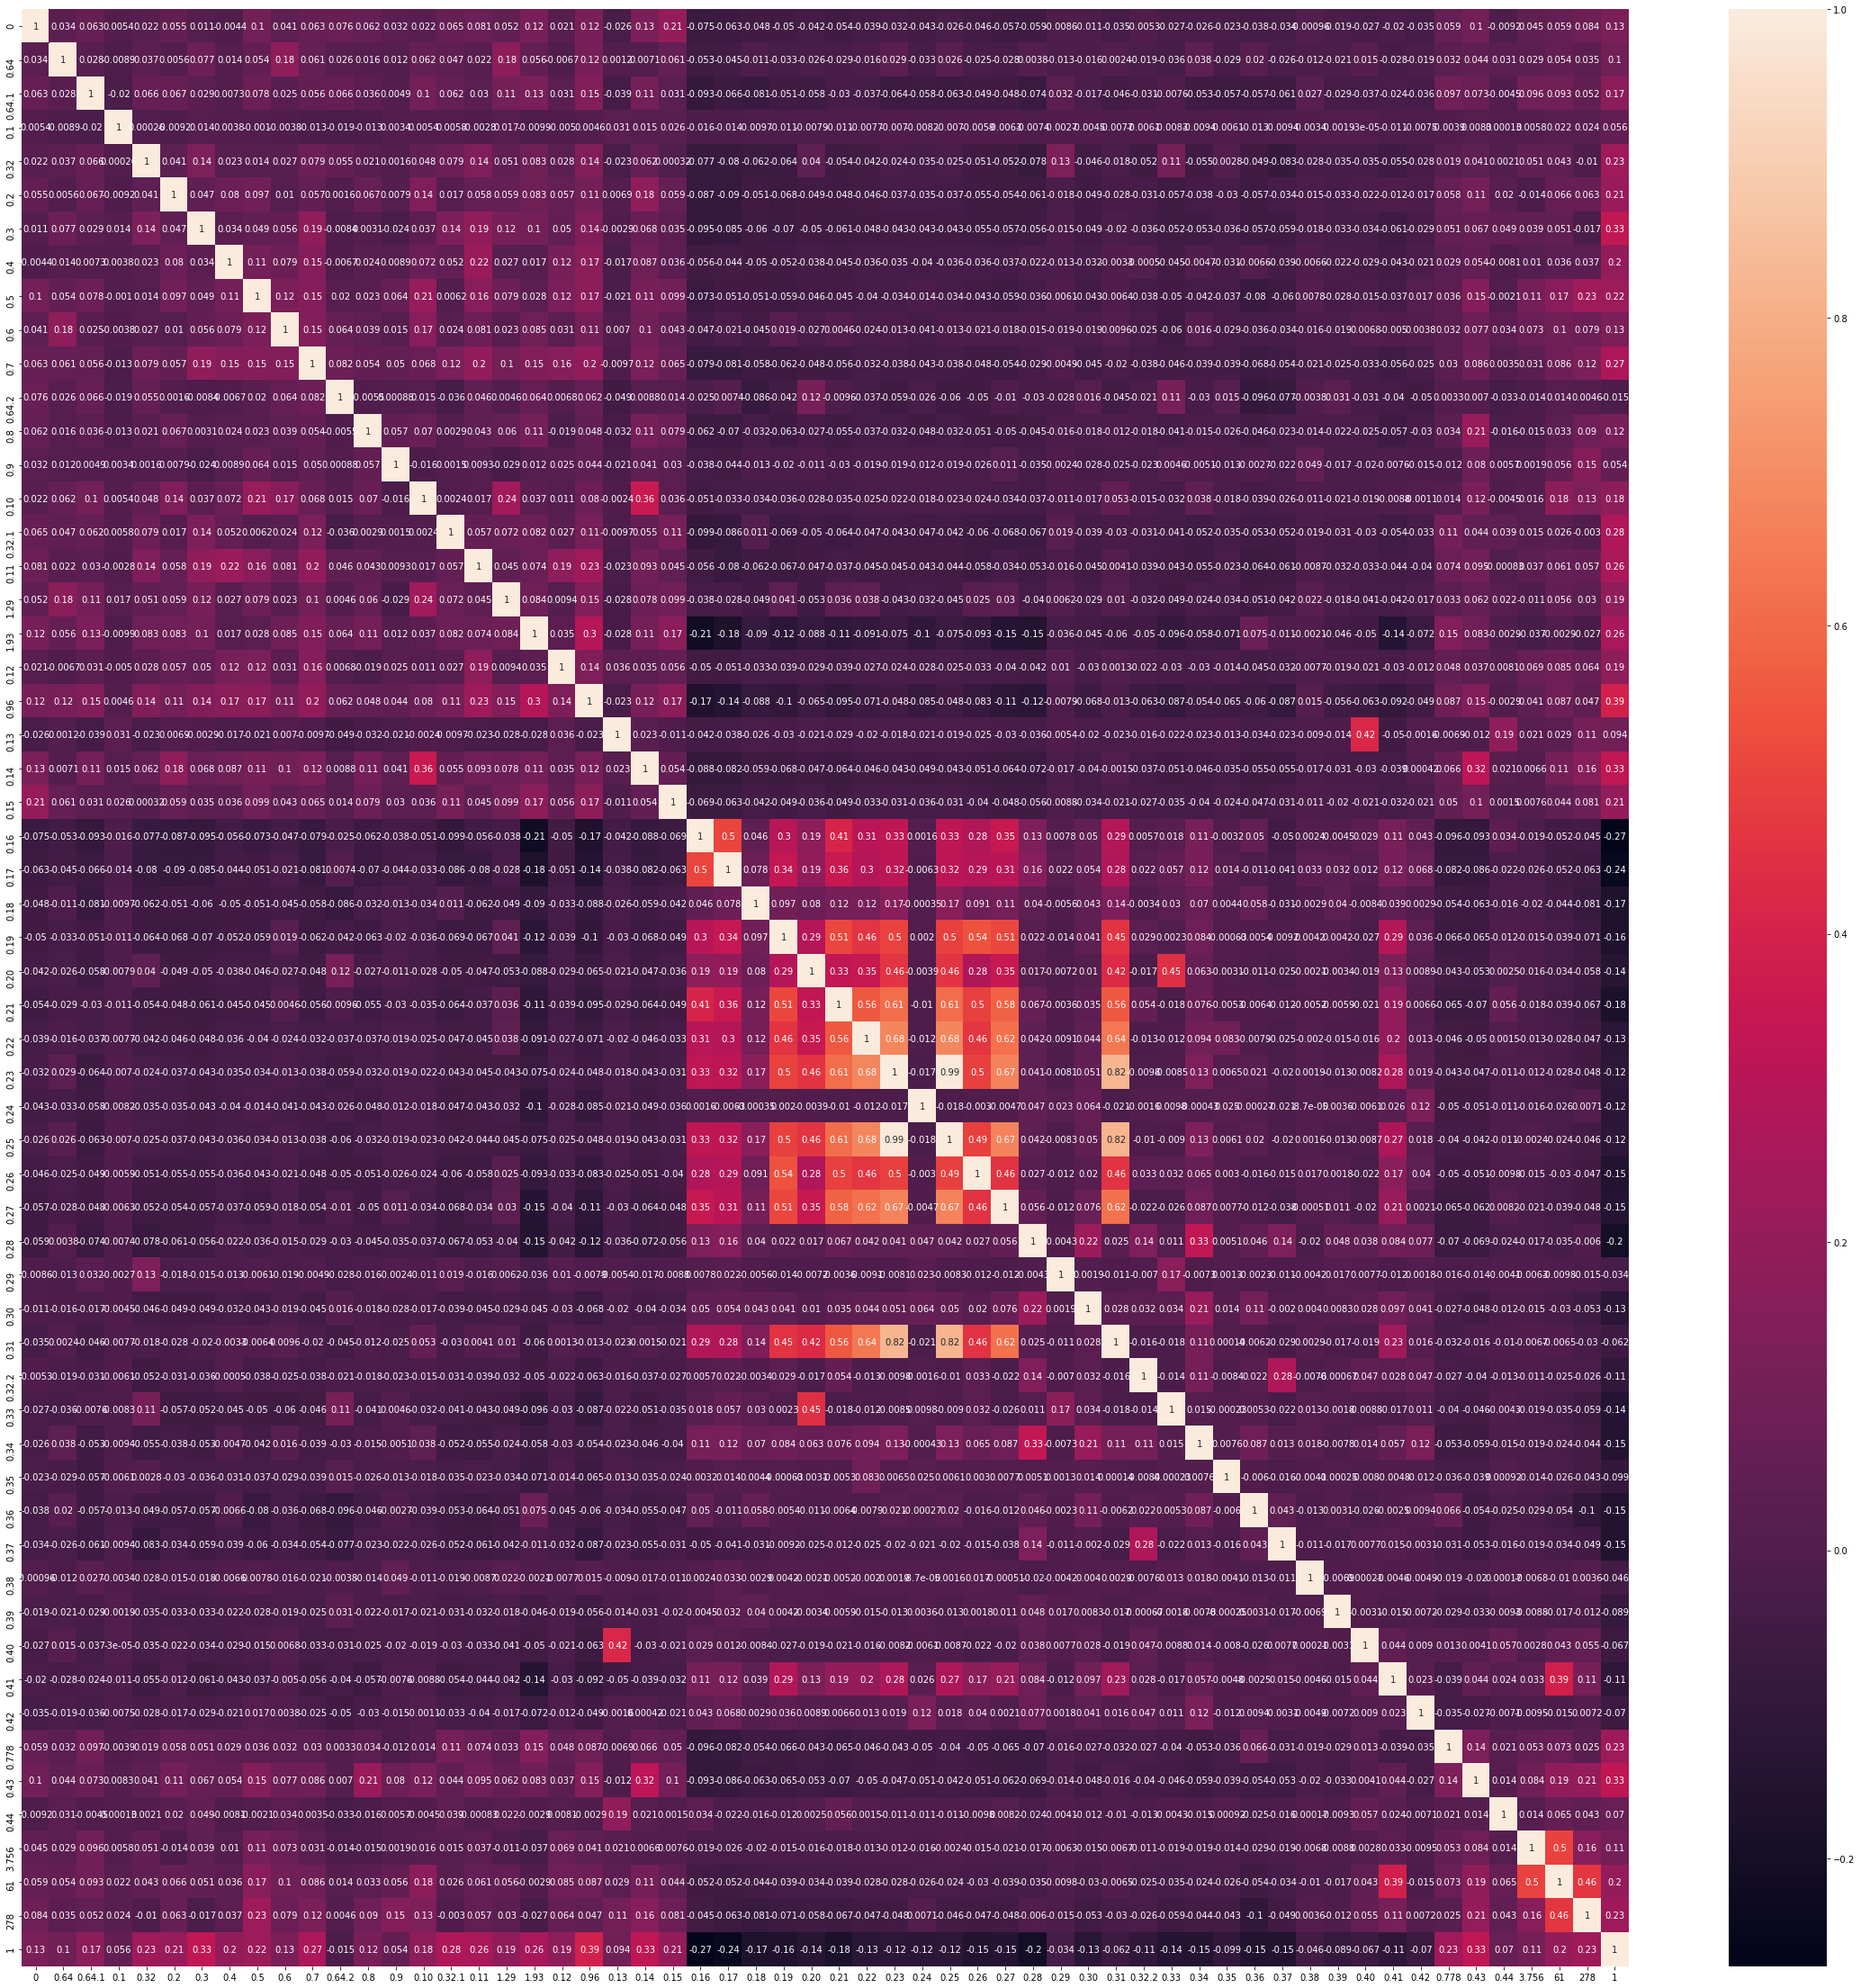

In [83]:
#plotting heatmap
#
plt.subplots(figsize=(40,40))
sns.heatmap(spam_df1.corr(),annot=True)

## **modeling**

### **Naive Bayes: 1: Gaussian Naive Bayes Classifier**

**a. splitting our data 80-20**

In [45]:
# preview of the dataset to be used
#
naive_df=spam_df1.copy()
naive_df.sample(5)

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,0.7,0.64.2,0.8,0.9,0.10,0.32.1,0.11,1.29,1.93,0.12,0.96,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32.2,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
1502,0.27,0.0,0.16,0.0,0.27,0.00,0.0,0.05,0.00,0.21,0.10,0.93,0.10,0.00,0.00,0.38,0.10,0.00,2.85,0.0,1.20,0.0,0.21,0.16,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.05,0.0,0.0,0.00,0.10,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.068,0.029,0.000,0.019,0.058,0.009,3.389,56,539,1
309,0.00,0.0,0.86,0.0,0.43,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.43,0.00,0.00,2.17,0.0,1.30,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.43,0.0,0.0,0.00,0.000,0.161,0.000,1.133,0.000,0.000,1.200,6,114,1
1867,0.02,0.0,0.15,0.0,0.24,0.31,0.0,0.04,0.22,0.00,0.02,0.08,0.00,0.00,0.02,0.00,0.00,0.02,0.08,0.0,0.06,0.0,0.00,0.00,0.44,0.47,0.02,0.0,0.00,0.00,0.0,0.0,0.11,0.0,0.0,0.00,0.00,0.02,0.00,0.0,0.0,0.02,0.0,0.0,0.00,0.0,0.0,0.00,0.185,0.150,0.044,0.000,0.006,0.000,2.838,52,2078,0
2957,0.08,0.0,0.16,0.0,0.58,0.08,0.0,0.00,0.08,0.00,0.00,2.24,0.08,0.16,0.00,0.00,0.08,0.00,0.99,0.0,0.74,0.0,0.08,0.00,0.74,0.66,0.00,0.0,0.82,0.99,0.0,0.0,0.00,0.0,0.0,0.08,0.08,0.00,0.16,0.0,0.0,0.24,0.0,0.0,0.08,0.0,0.0,0.08,0.080,0.011,0.000,0.000,0.000,0.000,2.100,60,500,0
3350,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.16,0.0,0.00,0.0,0.00,0.00,4.16,0.00,4.16,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.000,0.000,0.751,0.000,0.000,0.000,1.428,4,10,0


In [46]:

# Splitting our dataset into features/ indepedent and labels/ target variables
#
#The X contains attributes while y contains the labels.
X = naive_df.drop(columns = ['1']).values
y = naive_df['1'].values

In [47]:
#splitting our dataset into 80-20 train-test sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**interpretaion**:

* X_train: independent/input feature for training the model
* y_train: dependent/ target/ output feature for training the model
* X_test: independent/input feature for testing the model, will be used to predict the output value
* y_test: original depedent/output values of t-test, we'll compare this values with our predicted values to check the performance of our build model.
* train_ size= percentage of the data will go to training and test. set.
* random_state= this fix the split i.e there will be the same split each time you ran the code

In [48]:
#inporting and  Training our model
# 
clf = GaussianNB()  
model = clf.fit(X_train, y_train)

In [49]:
#predicting our test predictor
#
predicted = model.predict(X_test)
print("80-20 data split Accuracy of Gaussian: ", np.mean(predicted == y_test))

80-20 data split Accuracy of Gaussian:  0.8408551068883611


**b. splitting out data 70-30**

In [50]:
# Splitting our data into a 70% training set and a 30% test set
# 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [51]:
# Training our model
# 
clf = GaussianNB()  
model = clf.fit(X_train, y_train)

In [52]:
# Predicting our test predictors

predicted = model.predict(X_test)
print("70-30 data split Accuracy of Gaussian: ", np.mean(predicted == y_test))

70-30 data split Accuracy of Gaussian:  0.8297703879651623


**c.splitting our data 60-40**

In [53]:
# Splitting our data into a 70% training set and a 30% test set
# 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [54]:
# Training our model
# 
clf = GaussianNB()  
model = clf.fit(X_train, y_train)

In [55]:
# Predicting our test predictors

predicted = model.predict(X_test)
print("60-40 data split Accuracy of Gaussian: ", np.mean(predicted == y_test))

60-40 data split Accuracy of Gaussian:  0.8271971496437055


### **Naive Bayes: 2: Multinomial Naive Bayes Classifier**

In [56]:
# Splitting our dataset into features/ indepedent and labels/ target variables
#
#The X contains attributes while y contains the labels.
X = naive_df.drop(columns = ['1']).values
y = naive_df['1'].values

**a. splitting our data 80-20**

In [57]:
#splitting our dataset into 80-20 train-test sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
# Training our model
# 
clf = MultinomialNB(alpha=1,fit_prior=True,class_prior=None)  
model = clf.fit(X_train, y_train)

**observation**: i tried introducing smoothing techques, alpha= 1(manhattan distance), fit prior=True, and class_ preior=None.

In [59]:
# Evaluating the Model
# Once we have put together our classifier, we can evaluate its performance in the testing set
# 
predicted = model.predict(X_test)
print("80-20data split multimonial accuracy; ",np.mean(predicted == y_test))

80-20data split multimonial accuracy;  0.8147268408551069


**b. splitting our data 70-30**

In [60]:
#splitting our dataset into 70-30 train-test sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [61]:
# Training our model
# 
model = MultinomialNB(alpha=1,fit_prior=True,class_prior=None).fit(X_train, y_train)

In [62]:
# Evaluating the Model
# Once we have put together our classifier, we can evaluate its performance in the testing set
# 
predicted = model.predict(X_test)
print("70-30 data split multimonial accuracy: ", np.mean(predicted == y_test))

70-30 data split multimonial accuracy:  0.8060174188440221


**c. splitting our data 60-40**

In [63]:
#splitting our dataset into 60-40 train-test sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [64]:
# Training our model
# 
model = MultinomialNB(alpha=1,fit_prior=True,class_prior=None).fit(X_train, y_train)

In [65]:
# Evaluating the Model
# Once we have put together our classifier, we can evaluate its performance in the testing set
# 
predicted = model.predict(X_test)
print("60-40 data split multimonial accuracy: ", np.mean(predicted == y_test))

60-40 data split multimonial accuracy:  0.7903800475059383


### **Naive Bayes : 3: Bernoulli Naive Bayes Classifier**

In [66]:
# Splitting our dataset into features/ indepedent and labels/ target variables
#
#The X contains attributes while y contains the labels.
X = naive_df.drop(columns = ['1']).values
y = naive_df['1'].values

**a. splitting data 80-20**

In [67]:
#splitting our dataset into 80-20 train-test sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
#Creating oour Bernoulli Naive Bayes object with prior probabilities of each class
clf = BernoulliNB(alpha=1,fit_prior=True, class_prior=None)

In [69]:
# Train model
model = clf.fit(X, y)

In [70]:
# model score
print("80-20 split Barnouli accuracy: ", model.score(X, y))

80-20 split Barnouli accuracy:  0.8885721073889284


**b. splitting 70-30**

In [71]:
#splitting our dataset into 70-30 train-test sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [72]:
#Creating oour Bernoulli Naive Bayes object with prior probabilities of each class
clf = BernoulliNB()

In [73]:
# Train model
model = clf.fit(X, y)

In [74]:
# model score
print("70-30 split Barnouli accuracy: ", model.score(X, y))

70-30 split Barnouli accuracy:  0.8885721073889284


**c. splitting by 60-40**

In [75]:
#splitting our dataset into 70-30 train-test sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [76]:
#Creating oour Bernoulli Naive Bayes object with prior probabilities of each class
clf = BernoulliNB()

In [77]:
# Train model
model = clf.fit(X, y)

In [78]:
# model score
print("70-30 split Barnouli accuracy: ", model.score(X, y))

70-30 split Barnouli accuracy:  0.8885721073889284


**observartion**: by splitting data 80 for training and 20 for test set

* Gaussian attained 84% accuracy
* Multimonial had 81% accuracy
* Bernuili had 88.8% accuracy

therefore Bernuili perfomed much better than the other 2 models.

## 9. Follow up questions

1. Did we have the right data?

* yes

2. Do we need other data to answer our question?

* No

3. we need more data to do away with overfitting.

* yes, more data will be fine.

4. Did we have the right question?

* yes.